# Assignment 3 : Gradient Descent

# Milindi Shah
# J057

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# Univariate Regression

In [2]:
data = pd.read_csv('ex1data1.txt',header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.columns = ['Population','Profit']

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [6]:
print(X.shape)
print(y.shape)

(97, 1)
(97, 1)


In [7]:
m = y.size
ones = np.ones((m,1))
X1 = np.c_[ones,X]

In [8]:
print(X1.shape)
print(y.shape)

(97, 2)
(97, 1)


In [9]:
n = X1.shape[1]
theta1 = np.zeros((n,1))
theta1.shape

(2, 1)

In [10]:
def computeCost(error):
    m = error.shape[0]
    squared_error = np.dot(error.T, error)
    return squared_error[0][0]/m

In [11]:
def GD(X,y,theta,alpha,epoch):
    past_cost = []
    past_theta = [theta]
    m = y.size
    for i in range(epoch):
        h_theta = np.dot(X,theta)
        error = h_theta-y
        past_cost.append(computeCost(error))
        diff = np.dot(X.T, error)/m
        theta = theta - (alpha*diff)
        past_theta.append(theta)
    return past_cost, past_theta

In [12]:
past_cost, past_theta = GD(X=X1,y=y,theta=theta1,alpha=0.01,epoch=1000)

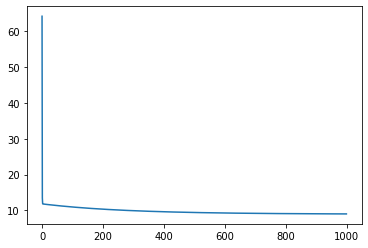

In [13]:
plt.plot(past_cost)

In [14]:
past_theta[-1]

array([[-3.24140214],
       [ 1.1272942 ]])

In [15]:
reg = LinearRegression()
reg.fit(X1,y)
print(reg.intercept_)
print(reg.coef_)

[-3.89578088]
[[0.         1.19303364]]


# Multivariate Regression

In [16]:
data2 = pd.read_csv('ex1data2.txt',header=None)
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
def normalize(dataframe):
    df = dataframe.copy()
    for col in df.columns:
        df[col] = (df[col]-df[col].mean())/df[col].std()
    return df

In [18]:
data2.columns = ['Size of the house (in square feet)','Number of bedrooms','Price of the house']
data2.head()

,Size of the house (in square feet),Number of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
normalized_df = normalize(data2)

In [20]:
X2 = normalized_df.iloc[:,:-1].values
y2 = normalized_df.iloc[:,-1].values.reshape(-1,1)

In [21]:
print(X2.shape)
print(y2.shape)

(47, 2)
(47, 1)


In [22]:
m = y2.size
ones = np.ones((m,1))
X2 = np.c_[ones,X2]

In [23]:
print(X2.shape)
print(y2.shape)

(47, 3)
(47, 1)


In [24]:
n = X2.shape[1]
theta2 = np.zeros((n,1))
theta2.shape

(3, 1)

In [25]:
past_cost2, past_theta2 = GD(X=X2,y=y2,theta=theta2,alpha=0.01,epoch=1000)

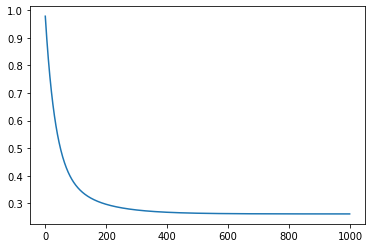

In [26]:
plt.plot(past_cost2)

In [27]:
past_theta2[-1]

array([[-1.10862856e-16],
       [ 8.78503652e-01],
       [-4.69166570e-02]])

In [28]:
reg2 = LinearRegression()
reg2.fit(X2,y2)
print(reg2.intercept_)
print(reg2.coef_)

[-1.15685754e-16]
[[ 0.          0.88476599 -0.05317882]]
